In [59]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine


In [20]:
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [21]:
features = data.feature_names
features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [22]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [24]:
# This only display non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [25]:
df.isna().sum()
# if there are nulls
# df.dropna()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

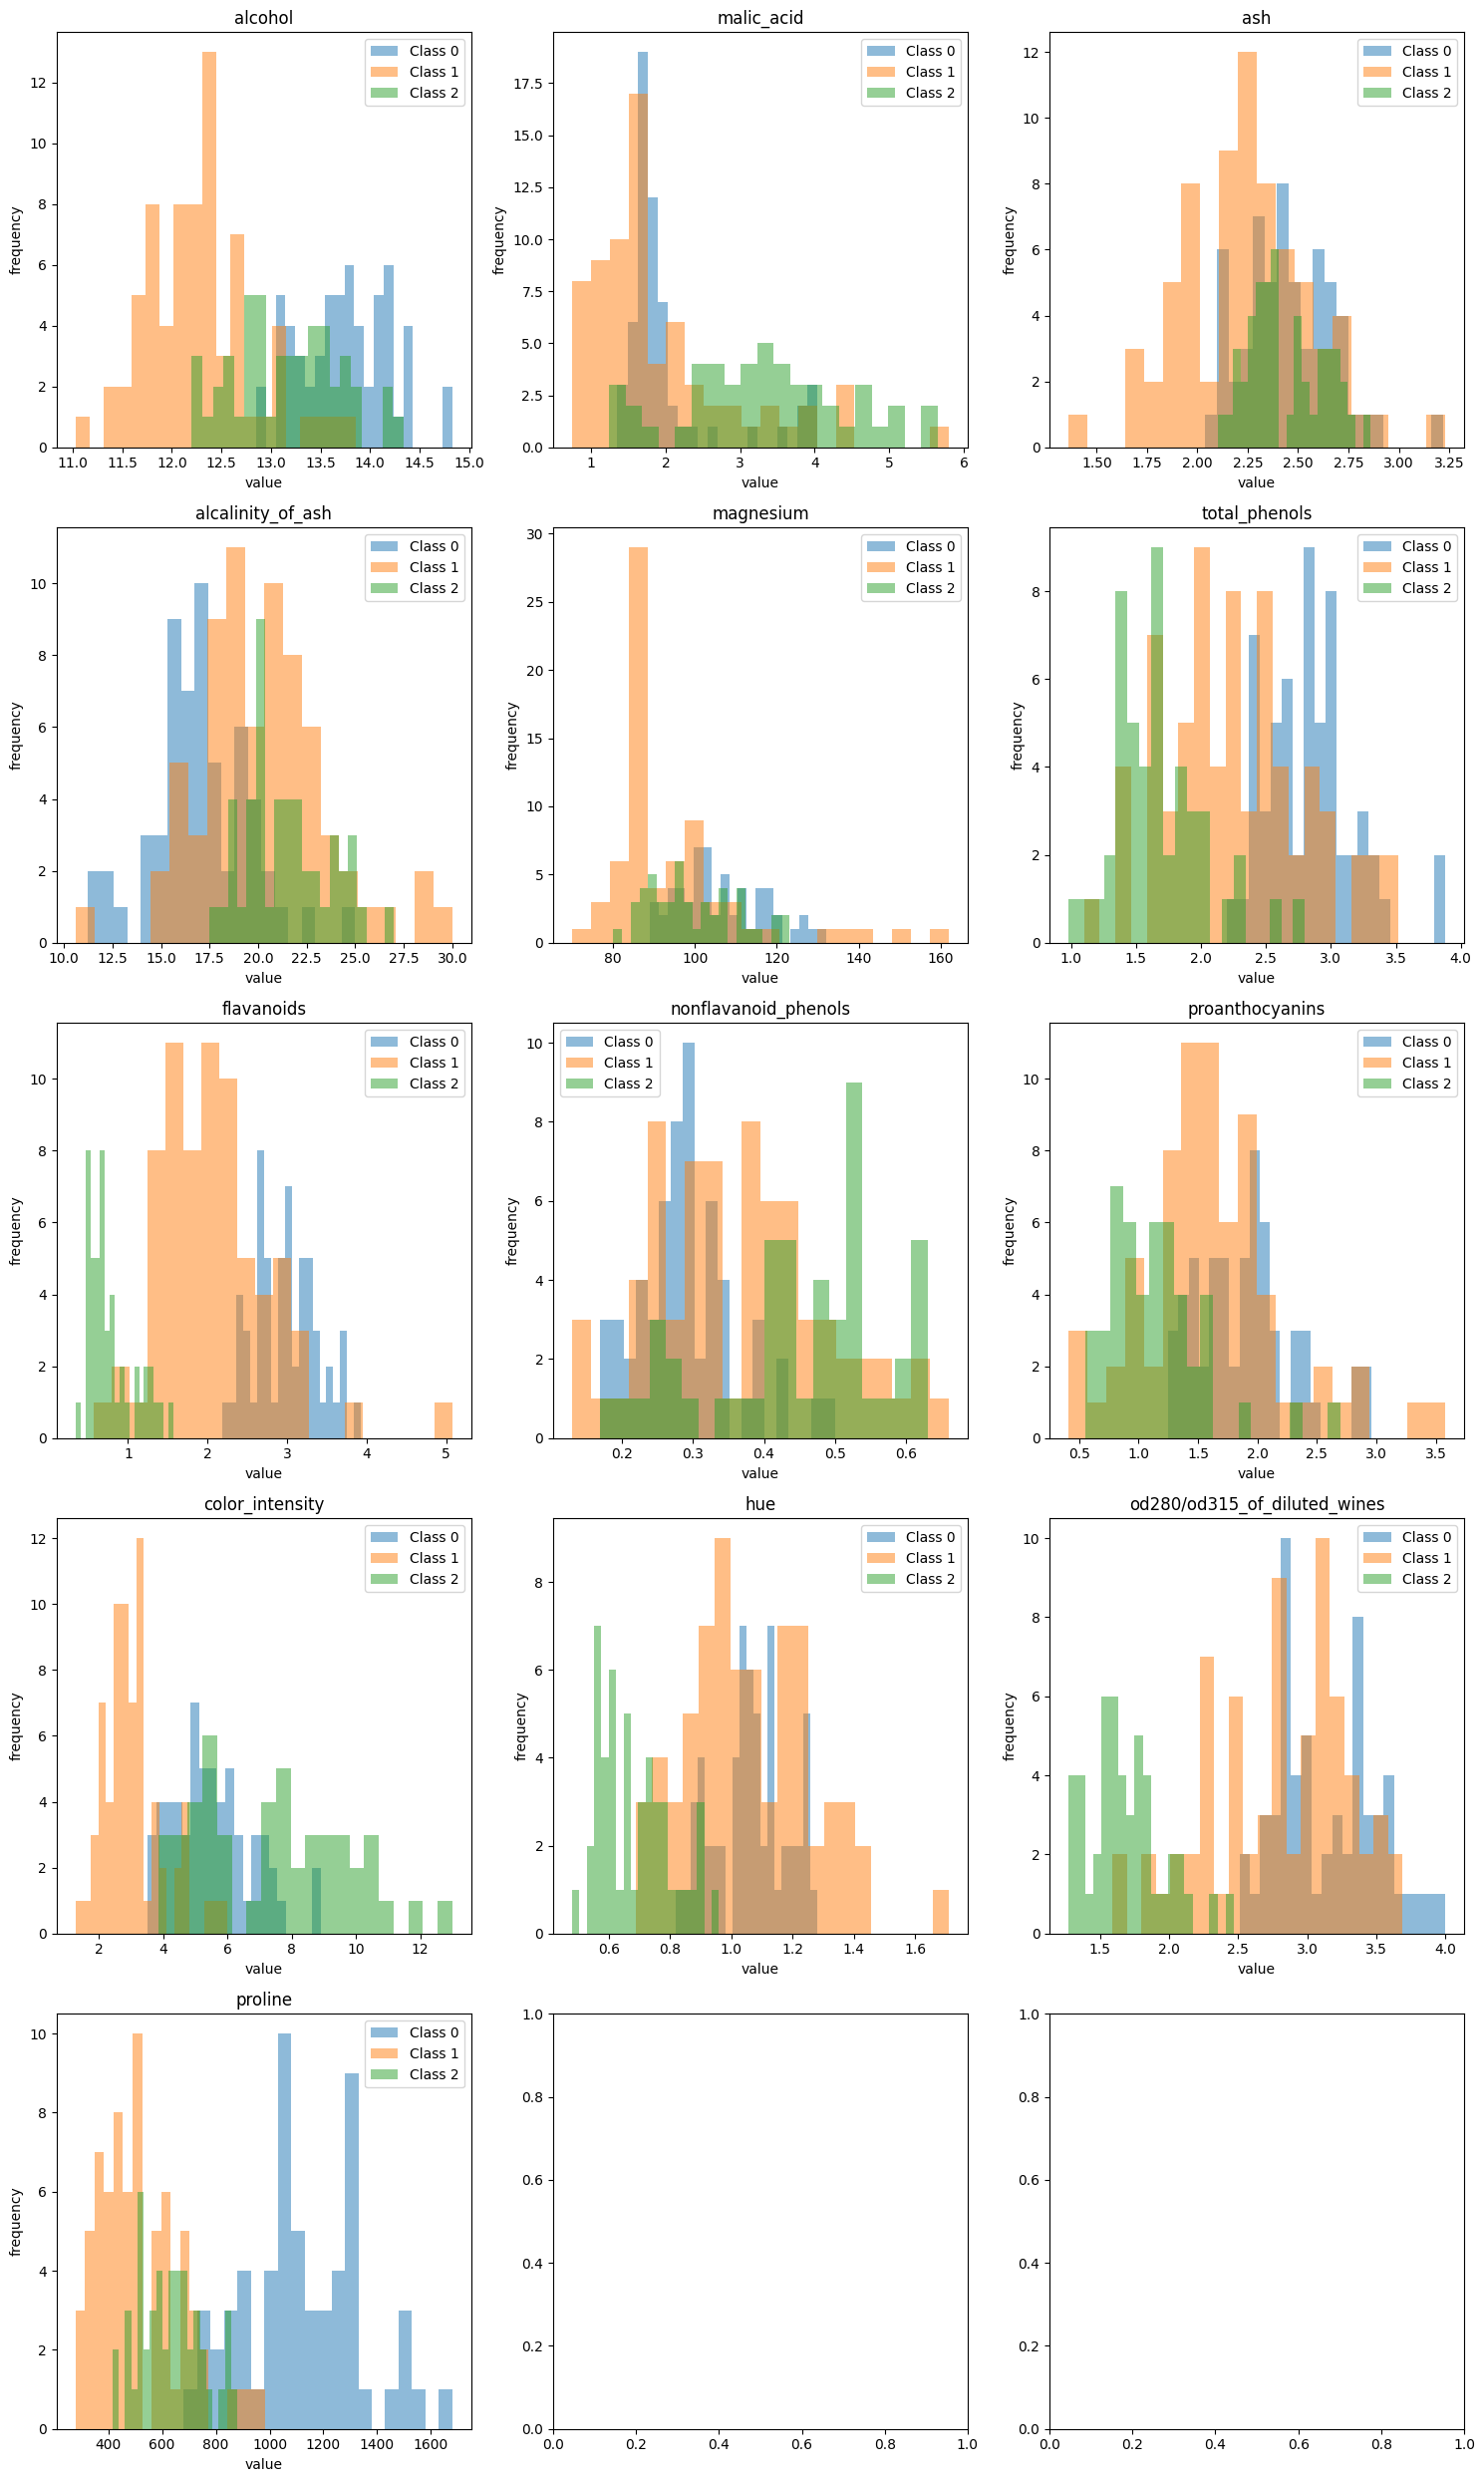

In [34]:
# For classification problems, I'd like to visually investigate the distributions first by target variable 

# set up the subplot grid 
figures, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))
axes = axes.ravel() # flatten the 2D array


for i, feature in enumerate(features):
    for target_class in df['target'].unique():
        df_target_class = df[df['target'] == target_class]
        axes[i].hist(df_target_class[feature], bins=20, alpha=0.5, label=f'Class {target_class}')
    axes[i].set_title(feature)
    axes[i].legend()
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('frequency')

plt.tight_layout()
plt.show()
        


In [41]:
top_2_features = ['proline', 'od280/od315_of_diluted_wines']
filtered_df = df[top_2_features + ['target']].copy()
filtered_df.head()

,proline,od280/od315_of_diluted_wines,target
0,1065.0,3.92,0
1,1050.0,3.40,0
2,1185.0,3.17,0
3,1480.0,3.45,0
4,735.0,2.93,0


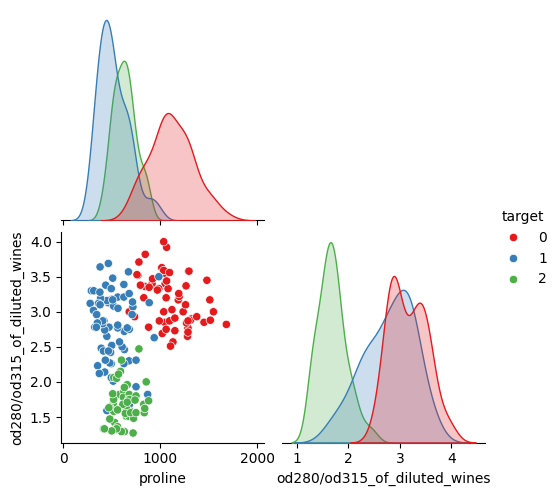

In [50]:
sns.pairplot(data=filtered_df, hue='target', corner=True, palette='Set1')
plt.show()

In [53]:
X_top_2 = df[top_2_features]
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_top_2_scaled = scaler.fit_transform(X_top_2)
X_top_2_scaled_df = pd.DataFrame(X_top_2_scaled, columns=top_2_features)
X_top_2_scaled_df.describe()


,proline,od280/od315_of_diluted_wines
count,1.780000e+02,1.780000e+02
mean,-1.197544e-16,2.235415e-15
std,1.002821e+00,1.002821e+00
min,-1.493188e+00,-1.895054e+00
25%,-7.846378e-01,-9.522483e-01
50%,-2.337204e-01,2.377348e-01
75%,7.582494e-01,7.885875e-01
max,2.971473e+00,1.960915e+00


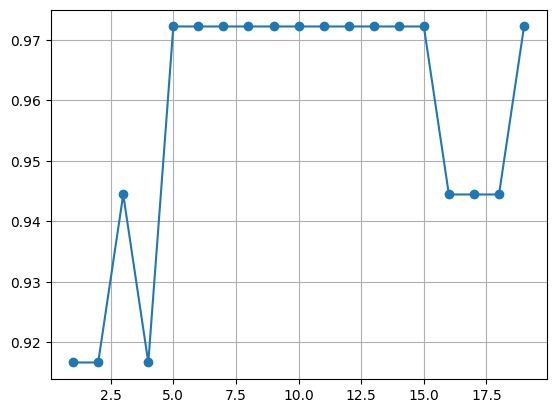

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_top_2_scaled, y, test_size=0.2, random_state=11)
neighbors = range(1, 20)
accuracy = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    accuracy[neighbor] = knn.score(X_test, y_test)

plt.plot(neighbors, accuracy.values(), marker='o')
plt.grid()
plt.show()

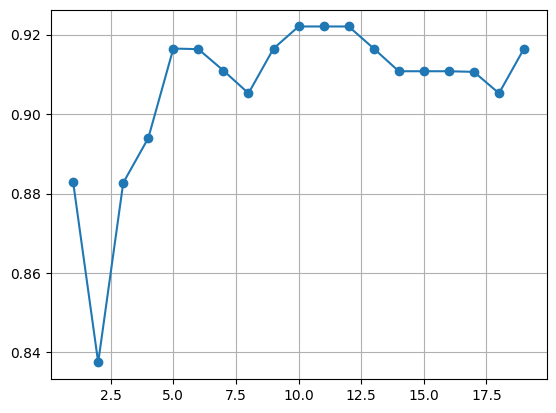

In [ ]:
mean_scores = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    scores = cross_val_score(knn, X_top_2_scaled, y, cv=5)
    mean_scores[neighbor] = scores.mean()
    
plt.plot(neighbors, mean_scores.values(), marker='o')
plt.grid()
plt.show()
    

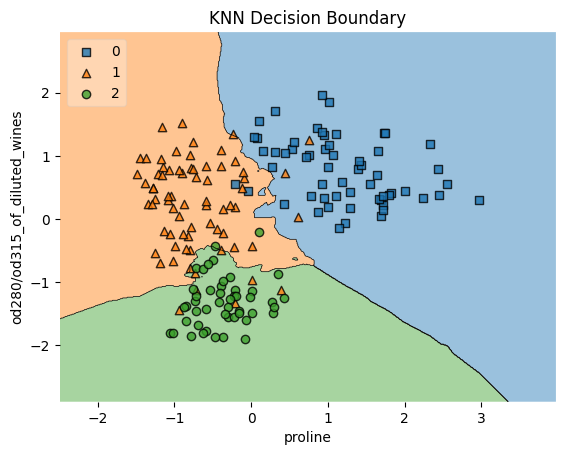

In [69]:
# draw the decision boundary using k = 5
from mlxtend.plotting import plot_decision_regions

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_top_2_scaled, y)


plot_decision_regions(X_top_2_scaled, y.to_numpy(), clf=knn, legend=2)
plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.title("KNN Decision Boundary")
plt.show()

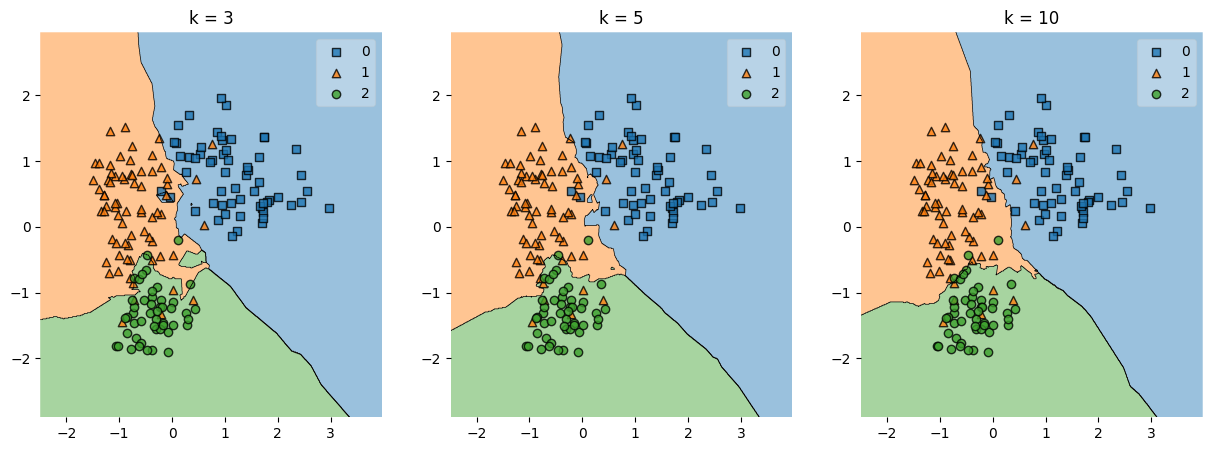

In [74]:
figures, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.ravel()

neighbors = [3, 5, 10]

for i, neighbor in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_top_2_scaled, y)
    plot_decision_regions(X_top_2_scaled, y.to_numpy(), clf=knn, legend=1, ax=axes[i])
    axes[i].set_title(f'k = {neighbor}')
    
plt.show()
    
    